In [3]:
from sklearn import cluster  # machine learning
import pandas as pd
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
import ystockquote as ys  
# stock prices  conda install -c https://conda.anaconda.org/roettm ystockquote
%pylab inline
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5)
rcParams['figure.figsize'] = (13, 6)  # default figure size
symbols = array(['GOOG','AAPL','AMZN','INTC','CTSH','BIDU'])
           

Python version 2.7.11 |Anaconda 2.0.0 (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.13.1
Populating the interactive namespace from numpy and matplotlib

/Users/dilip/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/dilip/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/Users/dilip/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
stock_df = pd.DataFrame({
             symbol: {
                 date: quote['Adj Close'] 
                 for date, quote in ys.get_historical_prices(symbol, '2006-01-01', '2016-04-08').items()
             }
             for symbol in symbols
         }, columns=symbols, dtype=float)
stock_df.tail()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2016-04-04,745.289978,111.120003,593.190002,32.000000,61.759998,188.970001
2016-04-05,737.799988,109.809998,586.140015,31.900000,61.180000,183.800003
2016-04-06,745.690002,110.959999,602.080017,32.080002,61.560001,186.820007
2016-04-07,740.280029,108.540001,591.429993,31.549999,59.990002,182.529999
2016-04-08,739.150024,108.660004,594.599976,31.629999,60.160000,183.979996


In [13]:
stock_df.head()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2006-01-03,217.397972,9.889311,47.580002,18.785440,12.6675,6.350
2006-01-04,222.397983,9.918416,47.250000,19.035227,12.7450,6.630
2006-01-05,225.394994,9.840360,47.650002,19.299707,12.5725,6.620
2006-01-06,232.597803,10.094373,47.869999,19.329093,12.8375,6.584
2006-01-09,233.217191,10.061298,47.080002,19.446640,13.0625,6.613


In [14]:
#  Remove NAN values if there is any 
stock_df.dropna(inplace=True)
stock_df.head()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2006-01-03,217.397972,9.889311,47.580002,18.785440,12.6675,6.350
2006-01-04,222.397983,9.918416,47.250000,19.035227,12.7450,6.630
2006-01-05,225.394994,9.840360,47.650002,19.299707,12.5725,6.620
2006-01-06,232.597803,10.094373,47.869999,19.329093,12.8375,6.584
2006-01-09,233.217191,10.061298,47.080002,19.446640,13.0625,6.613


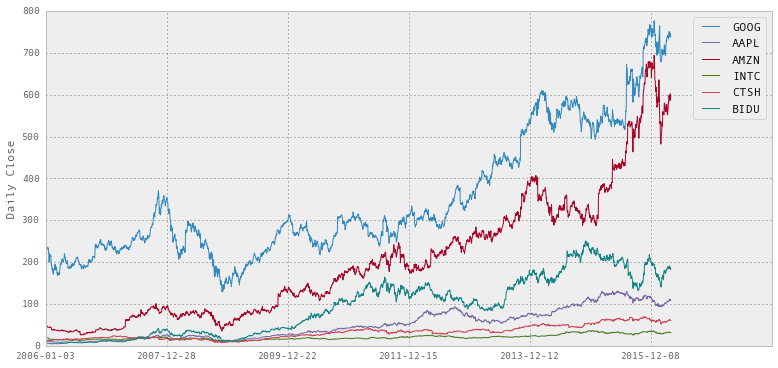

In [15]:
#stock_df[['GOOG', 'AAPL', 'AMZN','INTC','CTSH','BIDU']].plot()  
stock_df.plot()
ylabel('Daily Close')

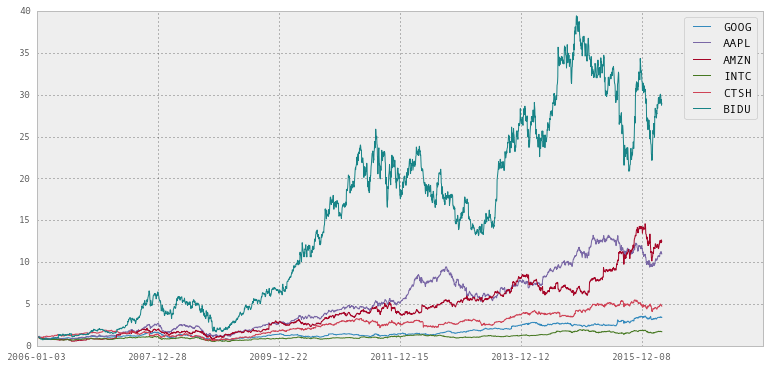

In [16]:
# Plot stock prices normalized from Day 1.

prices_norm = stock_df.copy()
for symbol in symbols:
    prices_norm[symbol] = stock_df[symbol]/stock_df[symbol][0]
prices_norm[['GOOG', 'AAPL', 'AMZN','INTC','CTSH','BIDU']].plot()

(0.81212346330487917, 30)

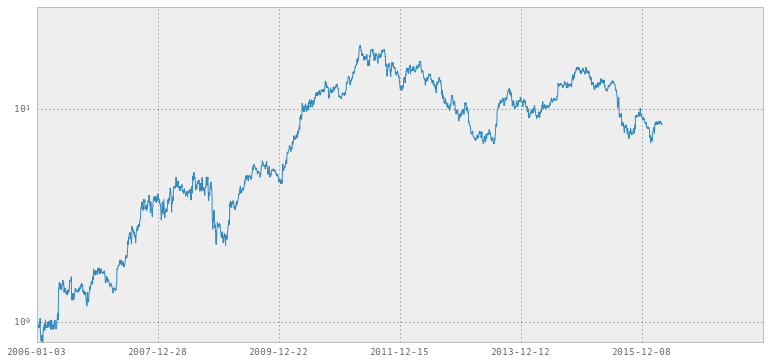

In [17]:
'''
Plot the ratio BIDU/GOOG.
'''
(prices_norm.BIDU/prices_norm.GOOG).plot(logy=True)
ylim(-0.5, 30)

(0.85699577185928066, 30)

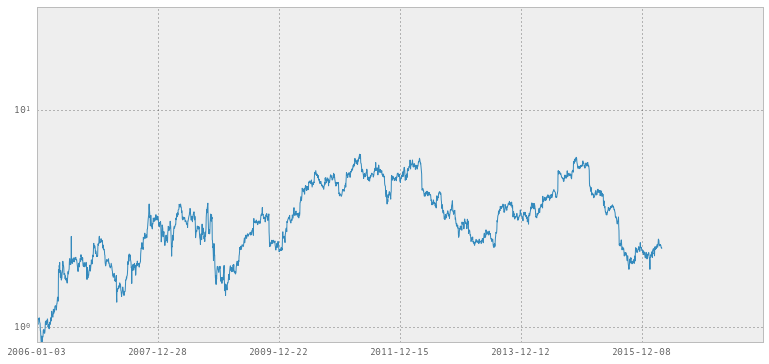

In [18]:
'''
Plot the ratio BIDU/AMZN.
'''
(prices_norm.BIDU/prices_norm.AMZN).plot(logy=True)
ylim(-0.5, 30)

(0.23906513578965852, 5)

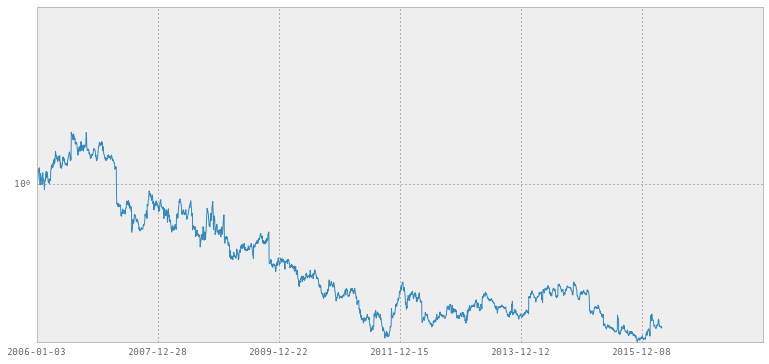

In [19]:
'''
Plot the ratio GOOG/AMZN.
'''
(prices_norm.GOOG/prices_norm.AMZN).plot(logy=True)
ylim(-1.0, 5)

In [20]:
'''
Compute the daily percent change for all stocks.
'''
stock_df.pct_change().tail()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2016-04-04,-0.006161,0.010274,-0.008872,-0.013868,-0.021546,-0.007145
2016-04-05,-0.010050,-0.011789,-0.011885,-0.003125,-0.009391,-0.027359
2016-04-06,0.010694,0.010473,0.027195,0.005643,0.006211,0.016431
2016-04-07,-0.007255,-0.021810,-0.017689,-0.016521,-0.025504,-0.022963
2016-04-08,-0.001526,0.001106,0.005360,0.002536,0.002834,0.007944


In [21]:
# Statistical info on the daily percent change
stock_df.pct_change().describe()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,0.000663,0.001160,0.001327,0.000378,0.000894,0.001847
std,0.019529,0.021517,0.026643,0.018794,0.024072,0.033151
min,-0.116091,-0.179195,-0.218220,-0.123843,-0.192123,-0.250433
25%,-0.008243,-0.009338,-0.011081,-0.009324,-0.010445,-0.014723
50%,0.000139,0.000948,0.000144,0.000477,0.000276,0.000474
75%,0.009650,0.012301,0.013498,0.009895,0.012459,0.017965
max,0.199915,0.139050,0.269497,0.118499,0.187788,0.368198


In [22]:
# Compute the correlation between each pair of ETFs.¶
correlation = stock_df.pct_change().corr()
correlation

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
GOOG,1.000000,0.506636,0.496996,0.451916,0.450967,0.475907
AAPL,0.506636,1.000000,0.415616,0.466515,0.449238,0.413366
AMZN,0.496996,0.415616,1.000000,0.416221,0.408932,0.410043
INTC,0.451916,0.466515,0.416221,1.000000,0.523113,0.378413
CTSH,0.450967,0.449238,0.408932,0.523113,1.000000,0.394525
BIDU,0.475907,0.413366,0.410043,0.378413,0.394525,1.000000


In [23]:
_, labels = cluster.affinity_propagation(correlation)
for label in range(max(labels)+1):
    print(label, symbols[labels==label])

(0, array(['GOOG', 'AAPL', 'AMZN', 'BIDU'], 
      dtype='|S4'))
(1, array(['INTC', 'CTSH'], 
      dtype='|S4'))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114df4210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113278510>]], dtype=object)

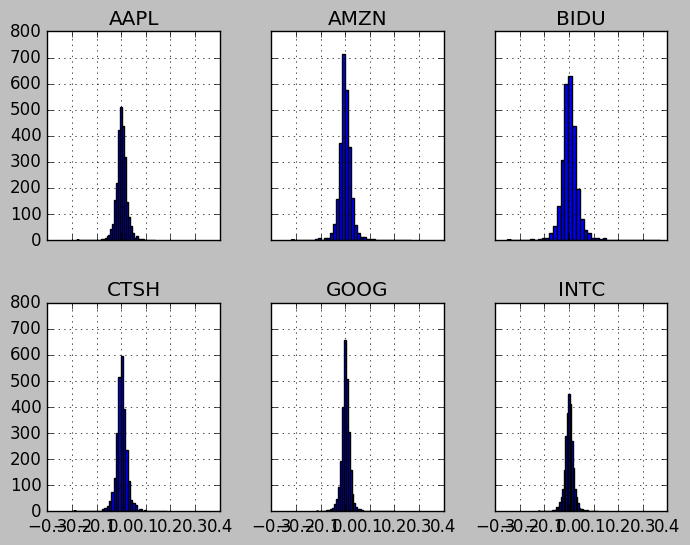

In [40]:
'''

Plot histograms of the daily percent change.

We find that the daily percent change is roughly Gaussian, which implies that the 
daily change follows a log-normal distribution.

'''

stock_df.pct_change().hist(column=['GOOG', 'AAPL', 'AMZN','INTC','CTSH','BIDU'], bins=40, sharex=True, sharey=True)


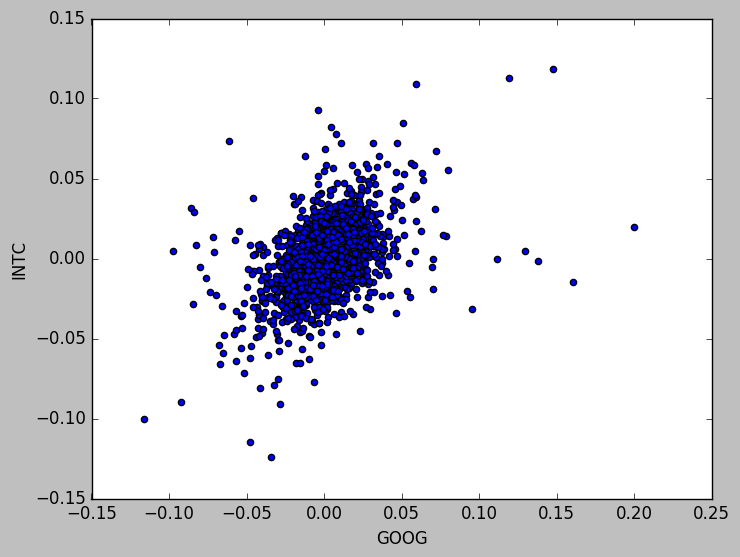

In [39]:
scatter(stock_df.GOOG.pct_change(), stock_df.INTC.pct_change())
xlabel('GOOG')
ylabel('INTC')

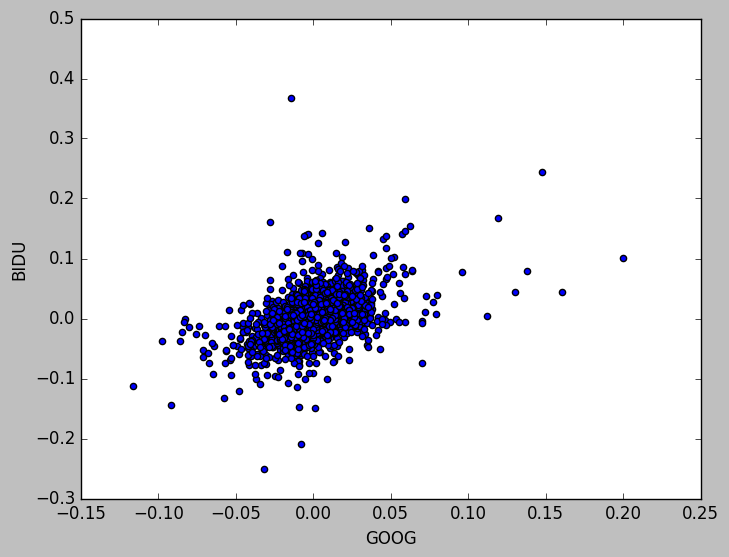

In [38]:
scatter(stock_df.GOOG.pct_change(), stock_df.BIDU.pct_change())
xlabel('GOOG')
ylabel('BIDU')

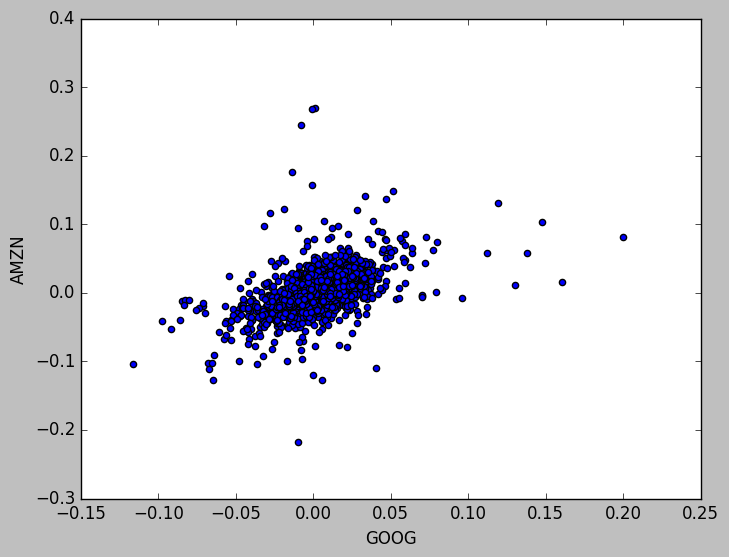

In [37]:
scatter(stock_df.GOOG.pct_change(), stock_df.AMZN.pct_change())
xlabel('GOOG')
ylabel('AMZN')

In [41]:
# assuming you use these proportions on day 1
portfolio = 0.5*prices_norm.BIDU + 0.3*prices_norm.GOOG + 0.2*prices_norm.AMZN
portfolio.pct_change().describe()


count    2583.000000
mean        0.001508
std         0.027936
min        -0.204831
25%        -0.012715
50%         0.000591
75%         0.015709
max         0.218704
dtype: float64

In [42]:
(0.8*prices_norm.GOOG + 0.2).pct_change().describe()

count    2583.000000
mean        0.000544
std         0.016116
min        -0.092693
25%        -0.006911
50%         0.000128
75%         0.008201
max         0.160957
Name: GOOG, dtype: float64

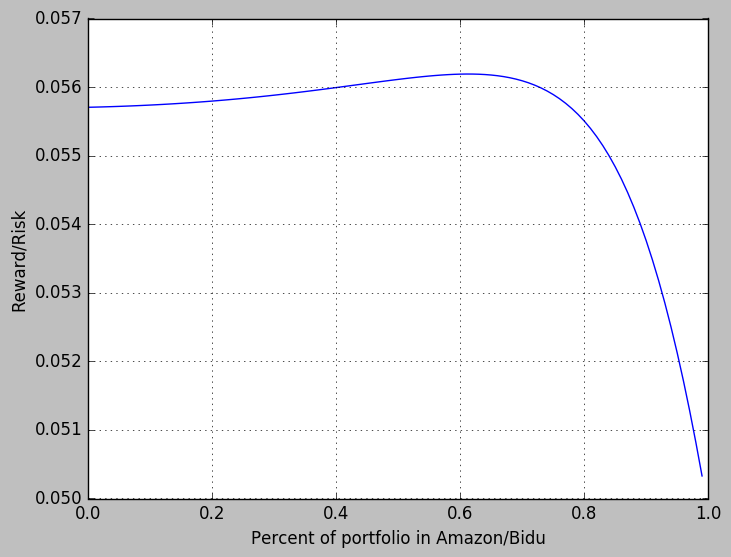

In [36]:
reward_over_risk = BIDU_AMZN.reward/BIDU_AMZN.risk
reward_over_risk.plot()
xlabel('Percent of portfolio in Amazon/Bidu')
ylabel('Reward/Risk')